In [2]:
import pandas as pd 
import numpy as np 
from collections import Counter as ct 
import matplotlib.pyplot as plt
from matplotlib import dates as dt 
import datetime


In [3]:
df = pd.ExcelFile('C:\\Users\\Pc\\OneDrive\\Desktop\\jupiter_projects\\Apocolypse Food Prep - Visualizations Tutorial.xlsx')
df

In [4]:
#details on the file sheets
df.sheet_names

['Apocolypse Store',
 'Apocolypse Sales',
 'Customer Information',
 'Customer Buyer Information']

In [5]:
#passing the sheets into pandas data frame 
store = df.parse(sheet_name='Apocolypse Store',)
store 

,Product ID,Product Name,Price,Production Cost
0,10001,Nylon Rope,30.99,13.67
1,10002,Waterproof Matches,7.99,2.89
2,10003,Stainless Steel Axe,45.50,32.45
3,10004,Backpack,39.99,26.92
4,10005,Multitool Survivial Knife,28.99,10.58
5,10006,Solar Battery Flashlight,26.49,13.41
6,10007,Weatherproof Jacket,79.99,30.59
7,10008,Duct Tape,6.25,4.87
8,10009,Water Purifier,30.25,17.93
9,10010,N95 Mask,2.75,1.01


In [6]:
#missing values 
for nulls in store.columns:
    missing = np.sum(store[nulls].isnull())
    print('{} - {}'.format(nulls, missing))

Product ID - 0
Product Name - 0
Price - 0
Production Cost - 0


In [7]:
#total profit made from each products
store['profit_prediction'] = store['Price'] - store['Production Cost']
store['profit_prediction']


0    17.32
1     5.10
2    13.05
3    13.07
4    18.41
5    13.08
6    49.40
7     1.38
8    12.32
9     1.74
Name: profit_prediction, dtype: float64

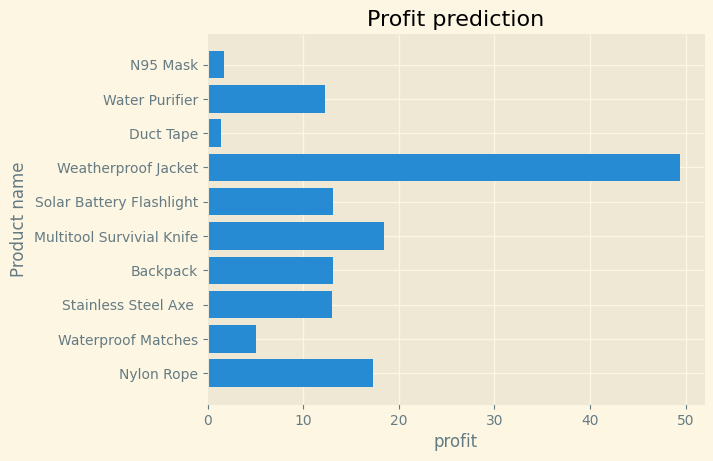

In [8]:
#which product is likely to make more profit.
plt.style.use('Solarize_Light2')
plt.barh(store['Product Name'], store['profit_prediction'])
plt.title('Profit prediction')
plt.ylabel('Product name')
plt.xlabel('profit')
plt.grid(True)
plt.show()



Text(-107.09166666666667, 0.5, 'Product name')

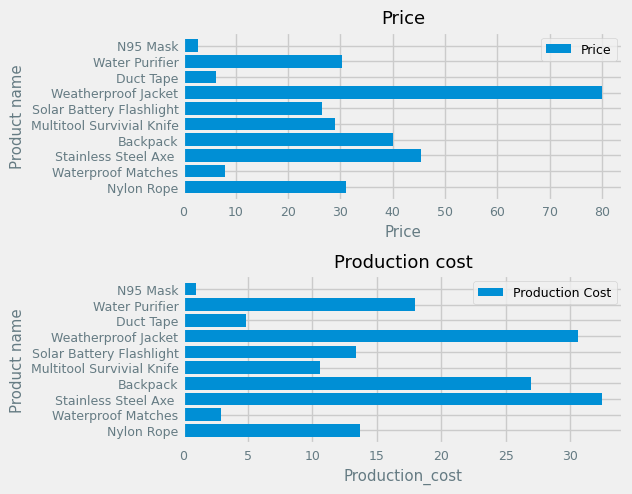

In [9]:
#create a subplot and plot the products aginst there price and production cost.

plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 9
fig, (p1, p2) = plt.subplots(nrows = 2, ncols = 1)
p1.barh(store['Product Name'], store['Price'], label= 'Price')
p1.set_title('Price')
p1.legend()
p1.grid(True)
p1.set_xlabel('Price')
p1.set_ylabel('Product name')


p2.barh(store['Product Name'], store['Production Cost'], label = 'Production Cost')
p2.set_title('Production cost')
plt.tight_layout()
p2.legend()
p2.grid(True)
p2.set_xlabel('Production_cost')
p2.set_ylabel('Product name')



In [10]:
#analysis on sheet two
sales = df.parse(sheet_name='Apocolypse Sales',
                 parse_dates=True)
sales 

,Cust ID,Customer,Product ID,Order ID,Units Sold,Date Purchased
0,1234,Uncle Joe's Prep Shop,10006,1904,32,2022-01-01
1,9876,Alex The Analyst Apocolype Preppers,10005,3966,68,2022-01-02
2,2468,Apocolypse Preppers United,10004,7348,69,2022-01-03
3,1357,Prep4Anything Prepping Store,10005,2409,48,2022-01-04
4,1234,Uncle Joe's Prep Shop,10010,2045,70,2022-01-05
...,...,...,...,...,...,...
69,1357,Prep4Anything Prepping Store,10007,6624,41,2022-03-11
70,1234,Uncle Joe's Prep Shop,10009,4952,37,2022-03-12
71,2468,Apocolypse Preppers United,10005,9881,24,2022-03-13
72,1234,Uncle Joe's Prep Shop,10002,4464,59,2022-03-14


In [11]:
#check for missing values 
for nulls in sales.columns:
    missing = np.sum(sales[nulls].isnull())
    print('{} - {}'.format(nulls, missing))

Cust ID - 0
Customer - 0
Product ID - 0
Order ID - 0
Units Sold - 0
Date Purchased - 0


In [12]:
#whichs days days had the total units sold greater than 59
units_sold = sales[sales['Units Sold'] >= 50]
dates = units_sold['Date Purchased']
dates.to_frame()

,Date Purchased
1,2022-01-02
2,2022-01-03
4,2022-01-05
6,2022-01-07
7,2022-01-08
8,2022-01-09
11,2022-01-12
12,2022-01-13
17,2022-01-18
18,2022-01-19


In [13]:
#which days had the toal units sold less than 50
unit_sold = sales[sales['Units Sold'] < 50]
units_sold
date = unit_sold['Date Purchased']
date.to_frame()

,Date Purchased
0,2022-01-01
3,2022-01-04
5,2022-01-06
9,2022-01-10
10,2022-01-11
13,2022-01-14
14,2022-01-15
15,2022-01-16
16,2022-01-17
19,2022-01-20


In [14]:
#which customers purchased the most products.
customers = sales['Customer'].unique()
unique = sales[sales['Customer'].isin(customers)]
unique = unique.sort_values(by = 'Customer') 
unique 

,Cust ID,Customer,Product ID,Order ID,Units Sold,Date Purchased
36,9876,Alex The Analyst Apocolype Preppers,10001,3587,48,2022-02-06
40,9876,Alex The Analyst Apocolype Preppers,10010,7274,60,2022-02-10
22,9876,Alex The Analyst Apocolype Preppers,10009,3887,49,2022-01-23
44,9876,Alex The Analyst Apocolype Preppers,10006,9760,26,2022-02-14
18,9876,Alex The Analyst Apocolype Preppers,10009,6762,70,2022-01-19
...,...,...,...,...,...,...
25,1234,Uncle Joe's Prep Shop,10001,7175,5,2022-01-26
31,1234,Uncle Joe's Prep Shop,10007,9562,50,2022-02-01
30,1234,Uncle Joe's Prep Shop,10007,4133,46,2022-01-31
12,1234,Uncle Joe's Prep Shop,10006,4033,51,2022-01-13


In [15]:
sales['Customer'].unique()

array(["Uncle Joe's Prep Shop", 'Alex The Analyst Apocolype Preppers ',
       'Apocolypse Preppers United', 'Prep4Anything Prepping Store'],
      dtype=object)

In [16]:
customer1 = unique[unique['Customer'] == 'Alex The Analyst Apocolype Preppers ']
sum_of_alex = customer1['Units Sold'].sum()
print(f' sum of alex  = {sum_of_alex}')

customer2 = unique[unique['Customer'] == "Uncle Joe's Prep Shop"]
sum_of_joe = customer2['Units Sold'].sum()
print(f' sum of joe = {sum_of_joe}')

customer3 = unique[unique['Customer'] == "Apocolypse Preppers United"]
sum_of_prepper_united = customer3['Units Sold'].sum()
print(f' sum of prep united = {sum_of_prepper_united}')

customer4 = unique[unique['Customer'] == "Prep4Anything Prepping Store"]
sum_of_prop4anything_prep_store = customer4['Units Sold'].sum()
print(f' sum of prep store = {sum_of_prop4anything_prep_store}')

 sum of alex  = 613
 sum of joe = 951
 sum of prep united = 828
 sum of prep store = 609


In [17]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

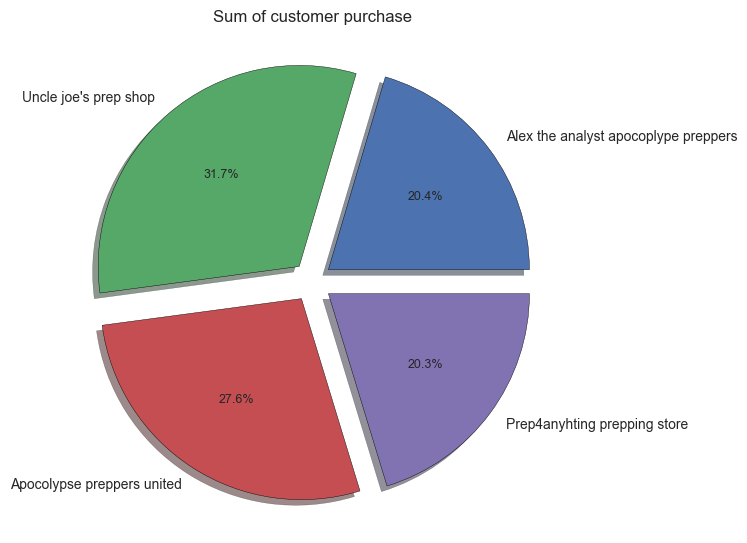

In [18]:
customer_names = ['Alex the analyst apocoplype preppers',
                  "Uncle joe's prep shop",
                  'Apocolypse preppers united',
                  'Prep4anyhting prepping store']

customer_lists = [sum_of_alex, sum_of_joe, sum_of_prepper_united, sum_of_prop4anything_prep_store]
explode = [0.1, 0.1, 0.1, 0.1]
plt.style.use('seaborn-v0_8')
plt.pie(customer_lists, labels = customer_names, wedgeprops={'edgecolor' : 'black'},
        shadow = True, explode = explode,
        autopct='%1.1f%%')
plt.title('Sum of customer purchase')
plt.tight_layout()
plt.grid(True)

In [19]:
#analysis on the third sheet 
customer_info = df.parse(sheet_name='Customer Information')
customer_info

,Customer ID,Customer,Address,City,State,Zipcode
0,1234,Uncle Joe's Prep Shop,123 Main Street,Dallas,Texas,70571
1,9876,Alex The Analyst Apocolype Preppers,369 Real Avenue,New York,New York,12546
2,2468,Apocolypse Preppers United,444 Four Street,Benson,Minnesota,93873
3,1357,Prep4Anything Prepping Store,927 Apoco Street,Jefferson City,Missouri,34979


In [20]:
#missing values
for nulls in customer_info.columns:
    missing = np.sum(customer_info[nulls].isnull())
    print('{} - {}'.format(nulls, missing))

Customer ID - 0
Customer - 0
Address - 0
City - 0
State - 0
Zipcode - 0


In [21]:
#pass the fourt table into a pandas data frame 
customer_buyer_info = df.parse(sheet_name='Customer Buyer Information')
customer_buyer_info

,Buyer ID,Product ID Purchased,Total Purchased,State,Age,Customer ID
0,115371,10003,396,TX,78,1234
1,110477,10010,12,MI,66,9876
2,158272,10002,112,TX,32,2468
3,182115,10009,454,FL,41,1357
4,183142,10005,102,NY,44,1234
5,189763,10007,68,NY,46,9876
6,133758,10010,496,DE,41,2468
7,133732,10009,956,DE,79,1357
8,109880,10009,218,MI,62,1234
9,165031,10008,677,IL,30,9876


In [22]:
#checkin for mssing values 
for nulls in customer_buyer_info.columns:
    missing = np.sum(customer_buyer_info[nulls].isnull())
    print('{} - {}'.format(nulls, missing))

Buyer ID - 0
Product ID Purchased - 0
Total Purchased - 0
State - 0
Age - 0
Customer ID - 0


In [23]:
age = customer_buyer_info['Age'].to_list()
purchace = customer_buyer_info['Total Purchased'].to_list()

In [24]:
age = [20, 30, 40,50, 60, 70, 80]
age

[20, 30, 40, 50, 60, 70, 80]

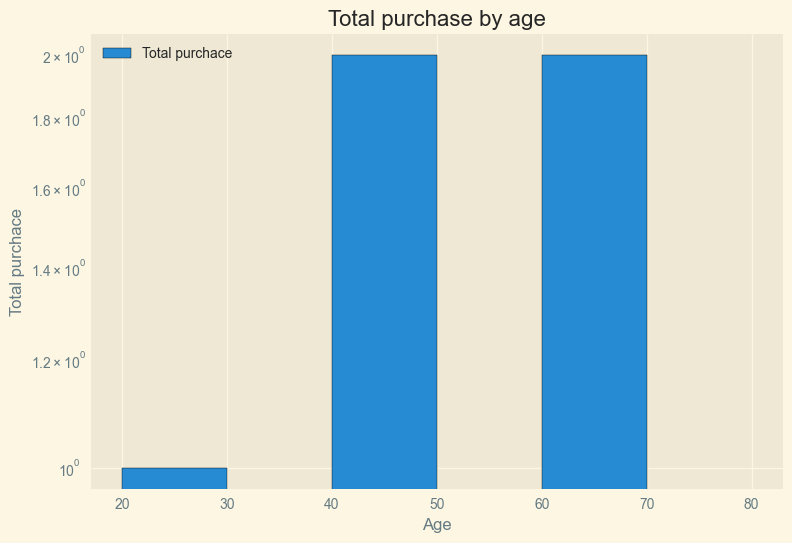

In [25]:
#which age bracket had a high product purchase


plt.style.use('Solarize_Light2')
plt.title('Total purchase by age')
plt.hist(purchace, bins = age, edgecolor = 'black', log = True, label = 'Total purchace')
plt.xlabel('Age')
plt.ylabel('Total purchace')
plt.legend()
plt.tight_layout()
plt.grid(True)


In [26]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

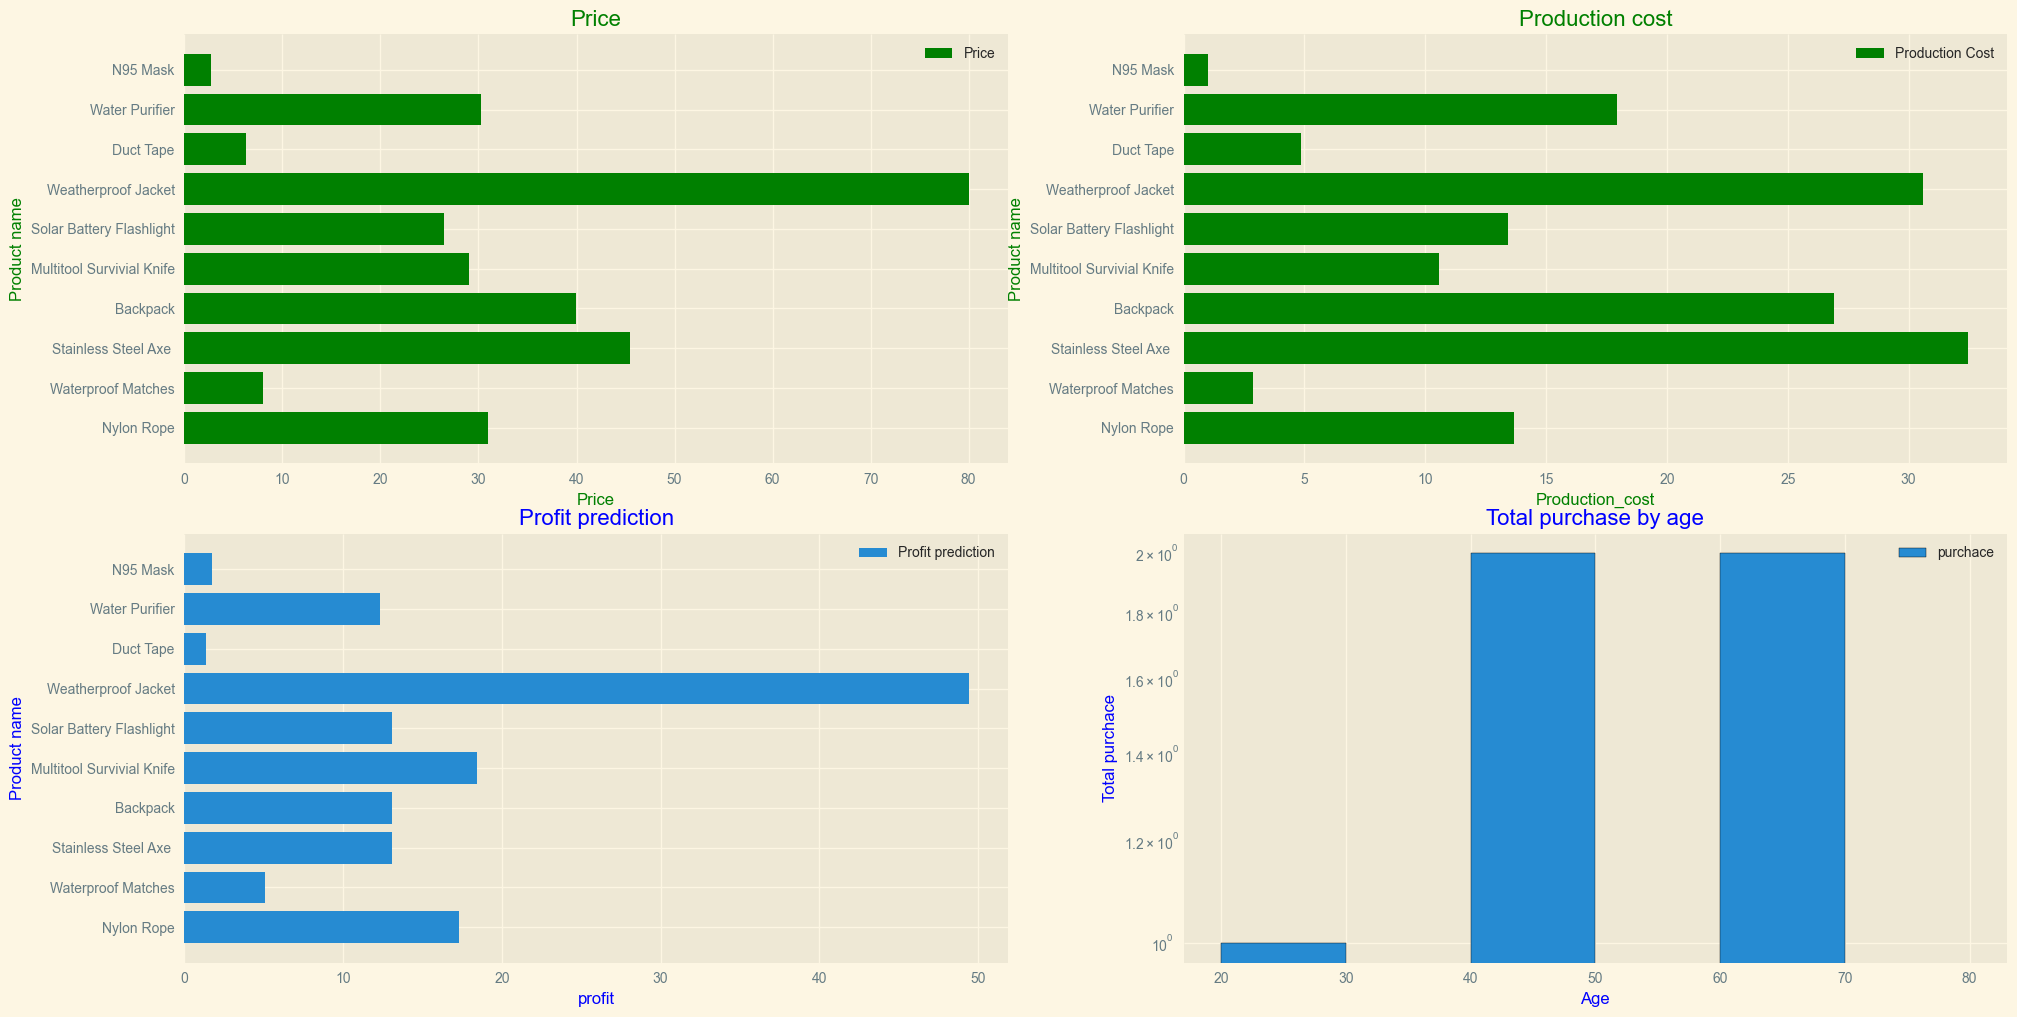

In [33]:
#create a subplot of all the plots.
plt.style.use('Solarize_Light2')

plt.rcParams['font.size'] = 0.9
fig, ((p1, p2), (p3, p4)) = plt.subplots(nrows = 2, ncols = 2, figsize = (20,10))
p1.barh(store['Product Name'], store['Price'], label= 'Price', color = 'green')
p1.set_title('Price', color = 'green')
p1.legend()
p1.grid(True)
p1.set_xlabel('Price', color = 'green')
p1.set_ylabel('Product name', color = 'green')



p2.barh(store['Product Name'], store['Production Cost'], label = 'Production Cost', color = 'green')
p2.set_title('Production cost', color = 'green')
p2.legend()
p2.grid(True)
p2.set_xlabel('Production_cost', color = 'green')
p2.set_ylabel('Product name', color = 'green')


p3.barh(store['Product Name'], store['profit_prediction'], label = 'Profit prediction')
p3.set_title('Profit prediction', color ='blue')
p3.set_ylabel('Product name', color = 'blue')
p3.set_xlabel('profit', color = 'blue')
p3.legend()
p3.grid(True)



p4.hist(purchace, bins = age, edgecolor = 'black', log = True, label = 'purchace')
p4.set_title('Total purchase by age', color = 'blue')
p4.set_xlabel('Age', color = 'blue')
p4.set_ylabel('Total purchace', color = 'blue')
p4.legend()
p4.grid(True)



plt.tight_layout()
plt.show()